In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler


In [214]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [215]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [216]:
# id 컬럼 없애기

train.drop(columns=['id'], inplace=True)


In [217]:
df= train

In [218]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [219]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# EDA

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [221]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## 수치형 시각화

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/244220688.py:22: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current 

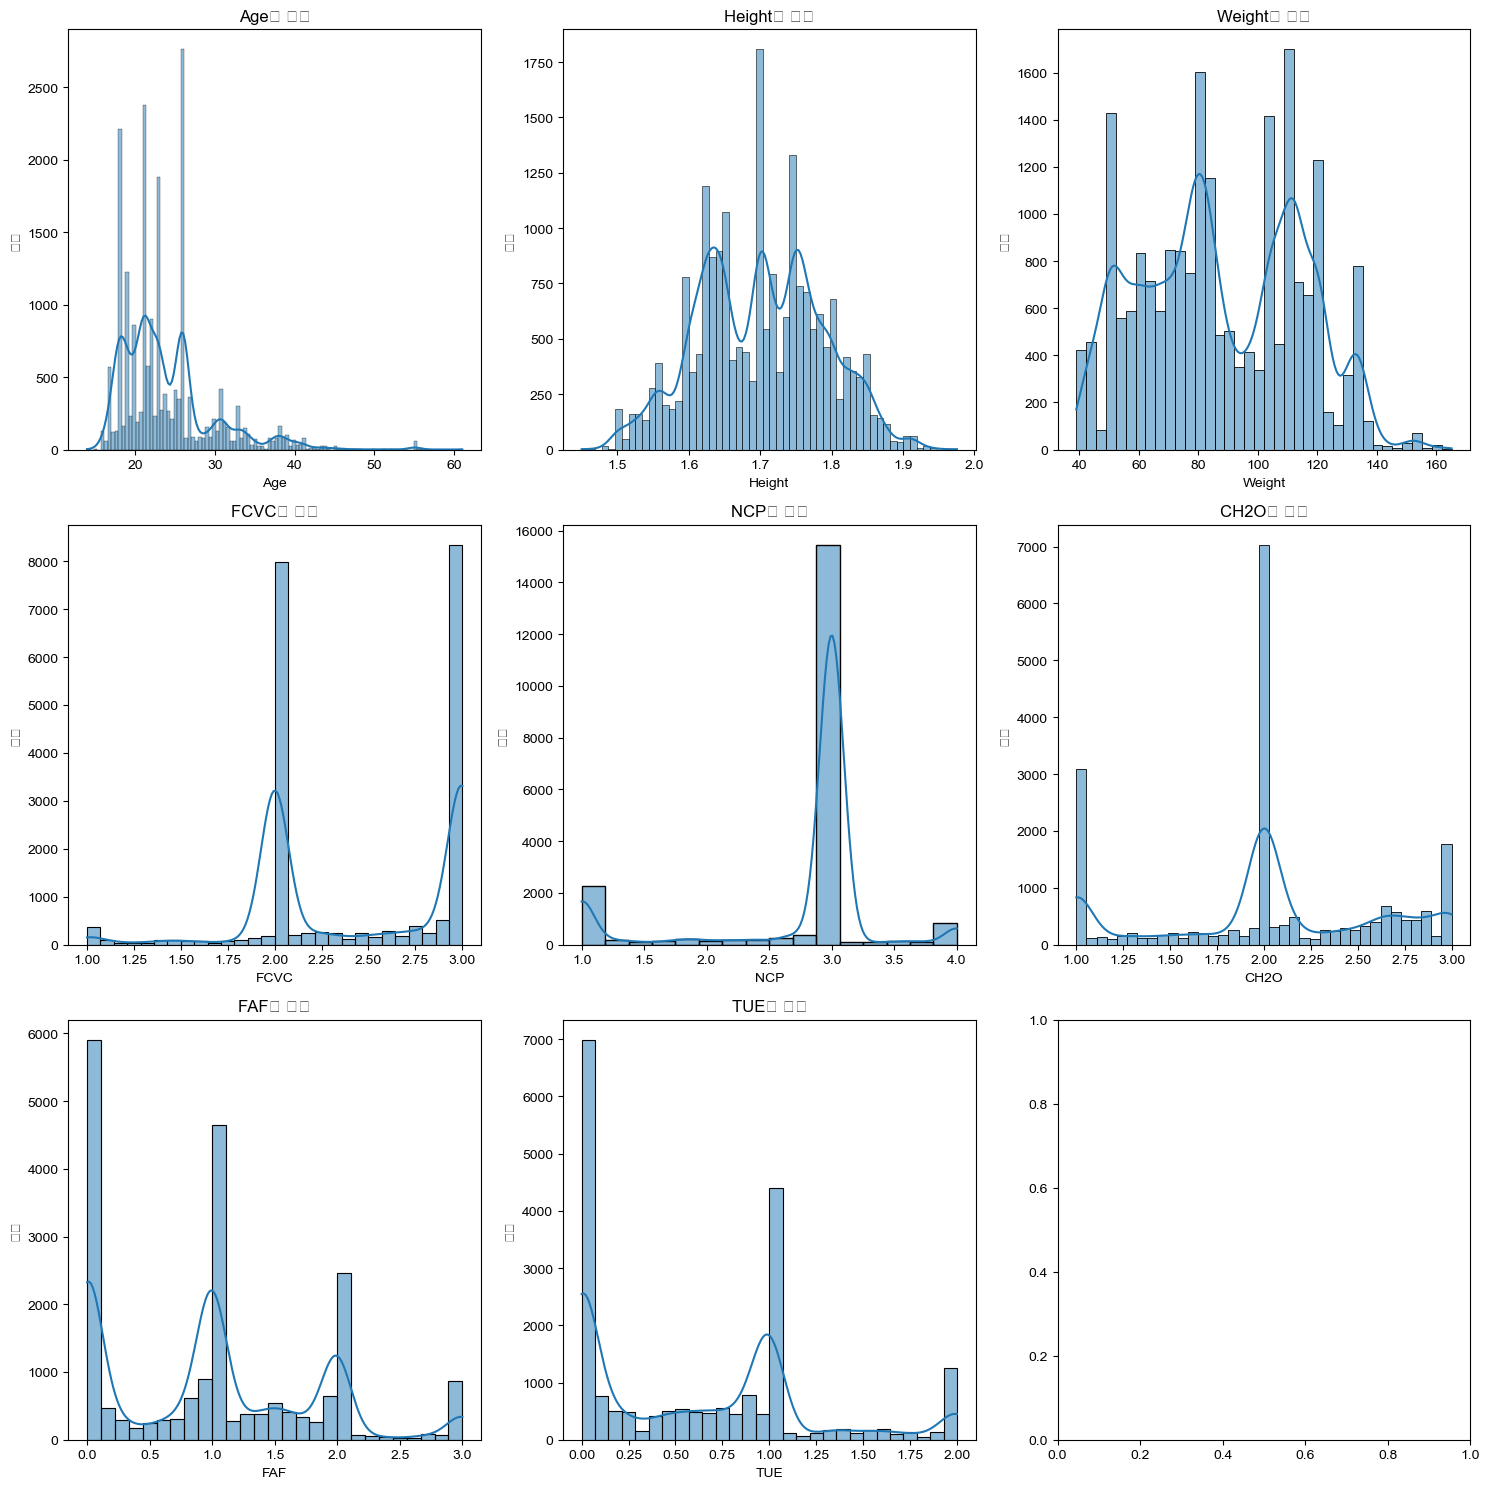

In [222]:
# 수치형 변수 열 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'AppleGothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


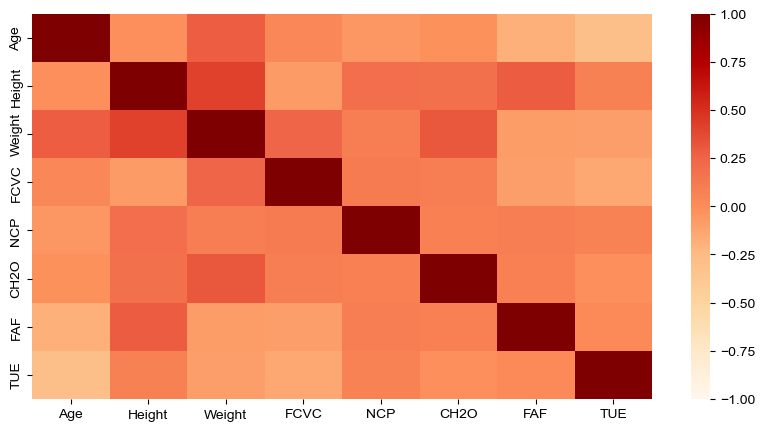

In [223]:
import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=False, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

## 범주형 시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/773600070.py:20: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/773600070.py:20: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


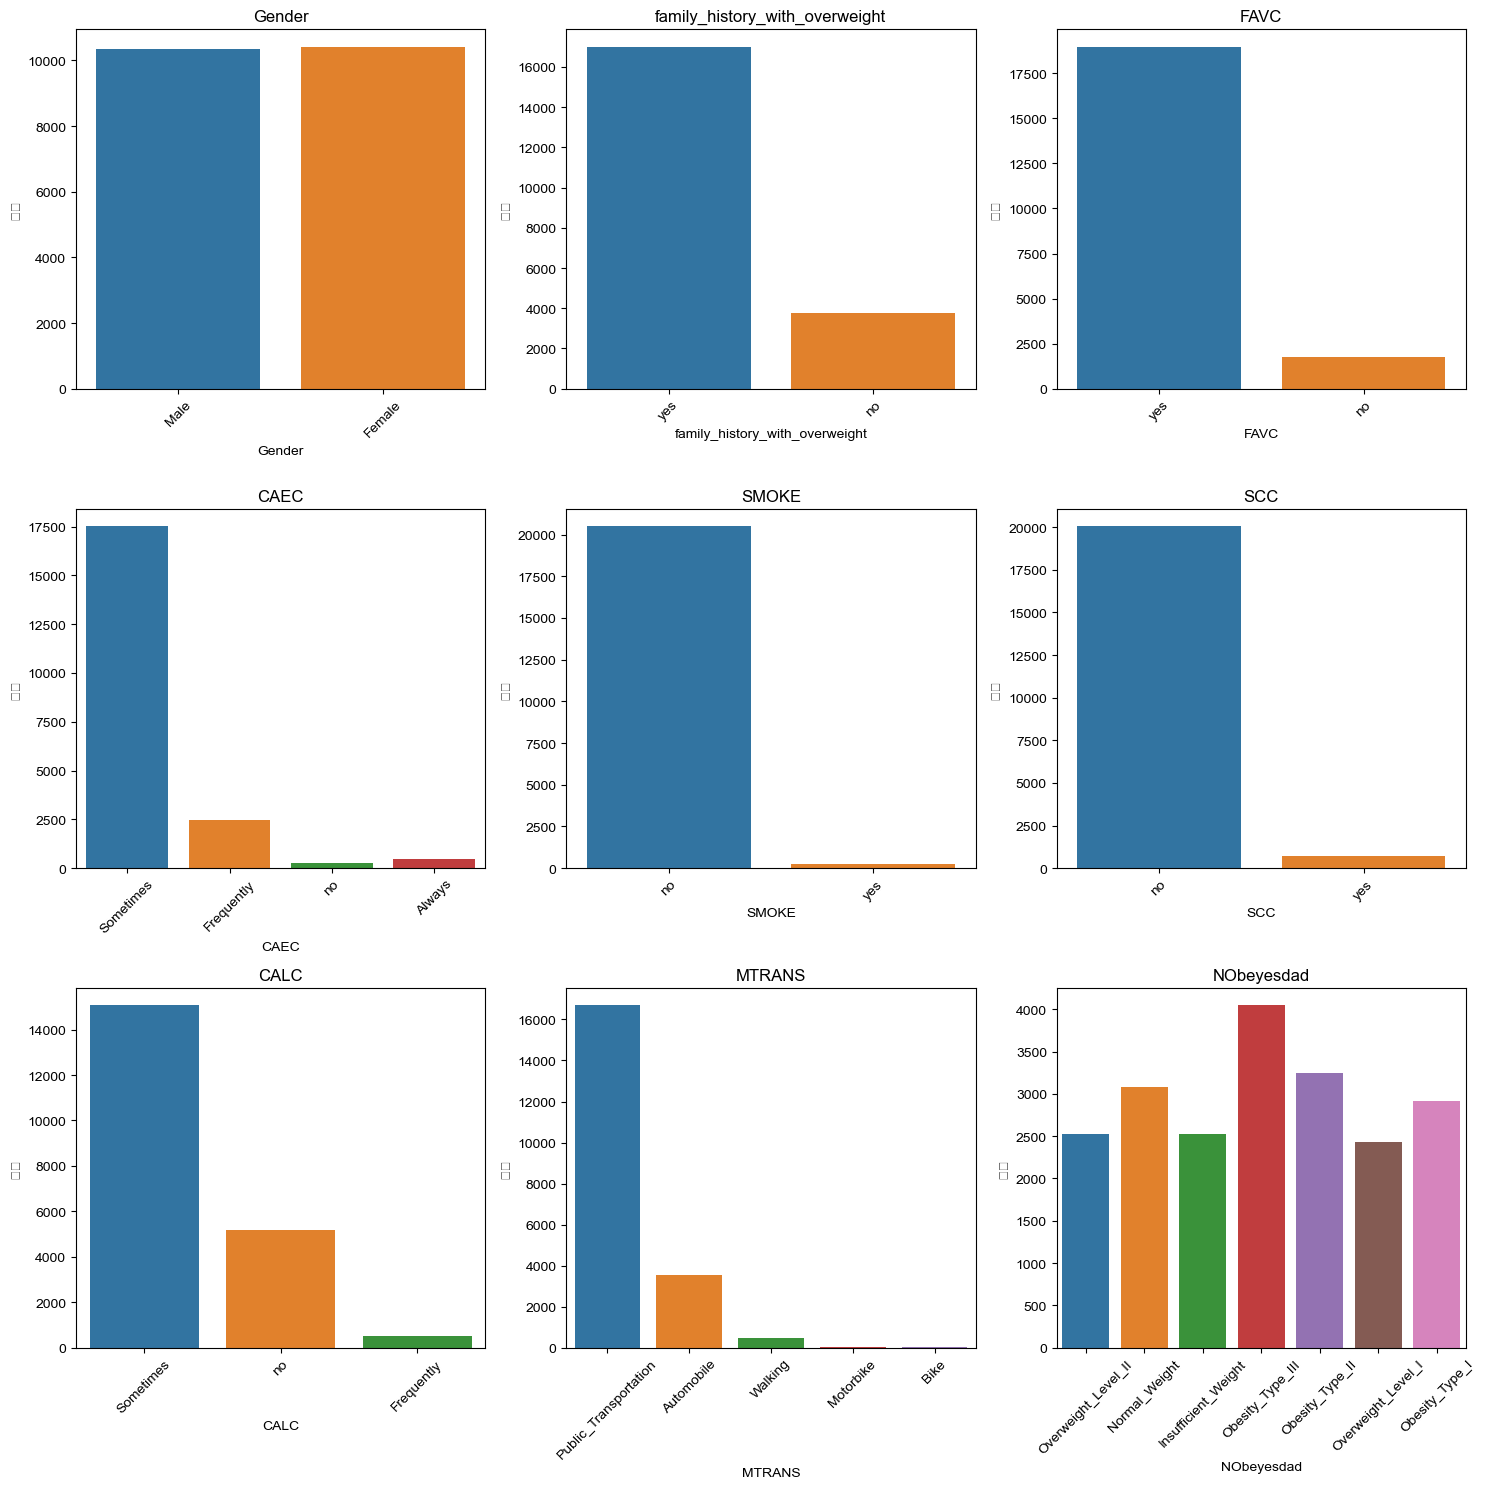

In [224]:
categorical_columns = df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


# 데이터 전처리

## 범주형 변수

In [225]:
# 범주형 변수들 원-핫인코딩으로
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# NObeyesdad를 라벨인코딩을 통해 숫자로 변환
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,False,...,True,False,False,True,False,False,False,False,True,False


## 수치형 변수

In [226]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 'NObeyesdad' 열 제외
numeric_columns_except_target = numeric_columns.drop('NObeyesdad')


numeric_data_except_target = df[numeric_columns_except_target]

# 객체 생성
scaler = StandardScaler()

# 표준화
scaled_numeric_data_except_target = scaler.fit_transform(numeric_data_except_target)

# 데이터프레임으로 변환
scaled_numeric_df_except_target = pd.DataFrame(scaled_numeric_data_except_target, columns=numeric_columns_except_target)

# 원래 데이터프레임에 표준화된 변수 추가
df[numeric_columns_except_target] = scaled_numeric_df_except_target


In [227]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,6,False,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1,True,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0,True,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,4,True,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,6,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686,3,False,...,True,False,False,True,False,False,False,False,True,False
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513,0,False,...,True,False,False,True,False,False,False,False,True,False
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092,3,False,...,True,False,False,False,True,False,False,False,True,False
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055,6,False,...,True,False,False,False,True,True,False,False,False,False


# 데이터 분할

In [228]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [229]:
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,False,True,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,True,False,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,True,False,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,True,False,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,False,True,...,True,False,False,True,False,False,False,False,True,False


In [230]:
y.head()

0    6
1    1
2    0
3    4
4    6
Name: NObeyesdad, dtype: int64

In [231]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9958,-1.202863,0.798937,0.345438,1.039171,0.338364,-0.048349,2.407607,0.636513,False,True,...,True,False,False,False,True,True,False,False,False,False
7841,-0.206438,0.608684,-1.251408,-0.836279,1.756085,-0.048349,1.214691,0.636513,False,True,...,True,False,False,False,True,False,False,False,True,False
9293,-0.352234,1.370087,1.294114,1.039171,0.169396,-0.631241,-0.288525,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
15209,3.016595,-1.377221,-0.299019,-0.836279,0.338364,-1.691863,-1.171141,-1.024344,True,False,...,True,False,False,True,False,True,False,False,False,False
16515,-0.147998,1.142541,0.269619,1.039171,0.338364,1.595165,1.214691,0.636513,False,True,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.027052,0.254451,-0.282234,0.342987,-0.281329,-0.303677,-0.827543,0.175253,True,False,...,True,False,False,False,True,False,False,False,True,False
11964,-0.323809,0.569868,0.269619,1.039171,0.338364,-0.048349,2.407607,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
5390,-0.499620,-0.919083,-0.753930,-0.836279,0.338364,1.595165,1.214691,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
860,0.379434,-0.574047,0.911789,1.039171,0.338364,1.218360,-1.171141,-0.630211,True,False,...,True,False,False,True,False,False,False,False,True,False


In [232]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((16606, 30), (4152, 30), (16606,), (4152,))

In [233]:
# test 데이터 전처리

test_df = test

# Remove id
test_df = test_df.drop(['id'], axis=1)
test_df['CALC'] = test_df['CALC'].replace('Always', 'Frequently')

test_df = pd.get_dummies(test_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
test_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,True,False,...,True,False,False,True,False,False,False,False,True,False
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,True,False,...,True,False,False,True,False,False,False,False,True,False
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,True,False,...,True,False,False,True,False,False,False,False,True,False


In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [794]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [795]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [796]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [797]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [798]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [799]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [800]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

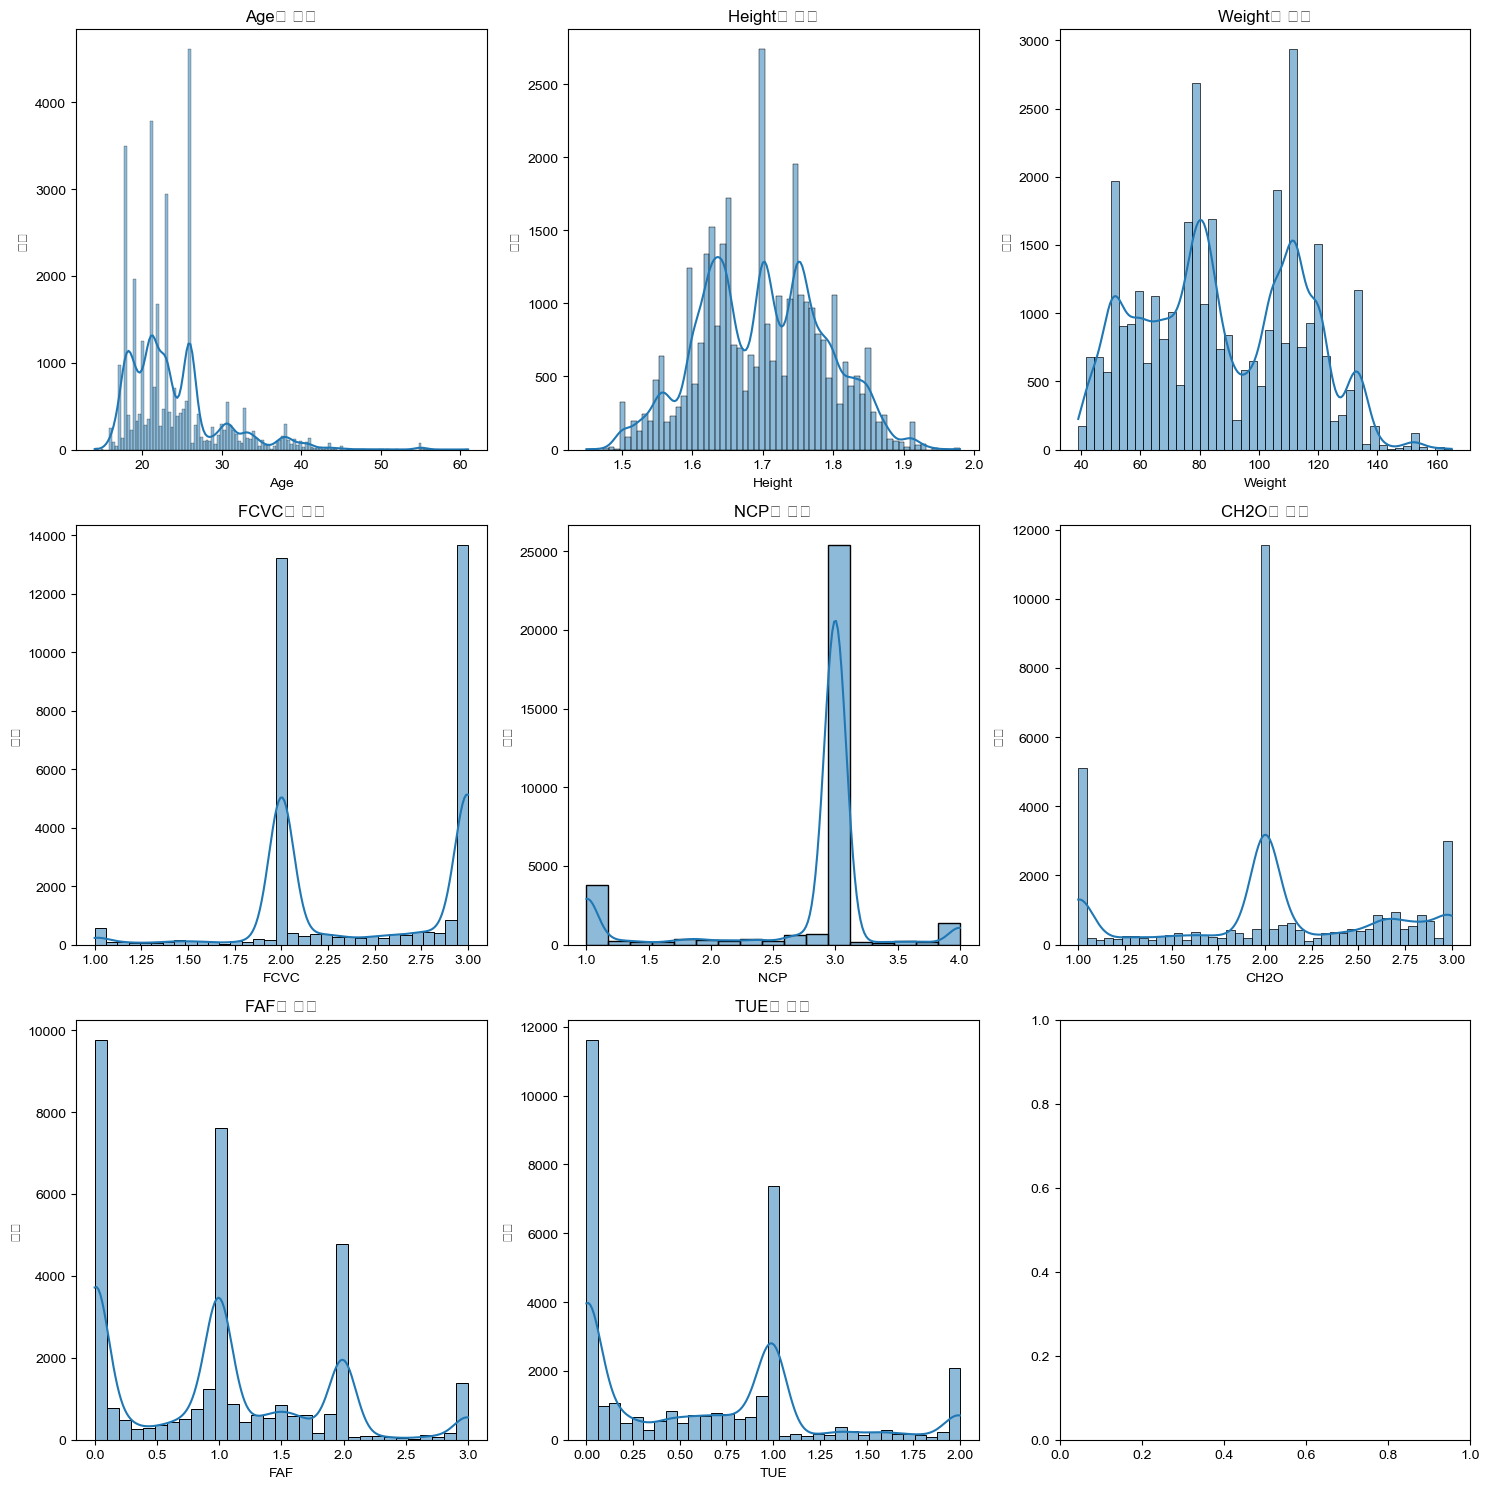

In [801]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'malgun'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


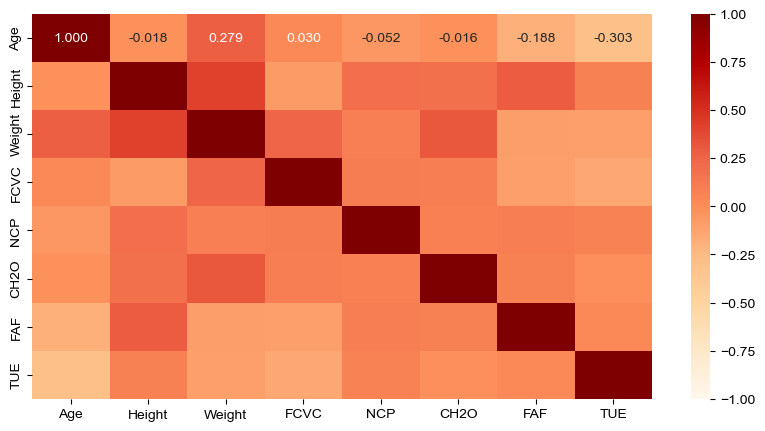

In [802]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/1938181307.py:21: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/1938181307.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


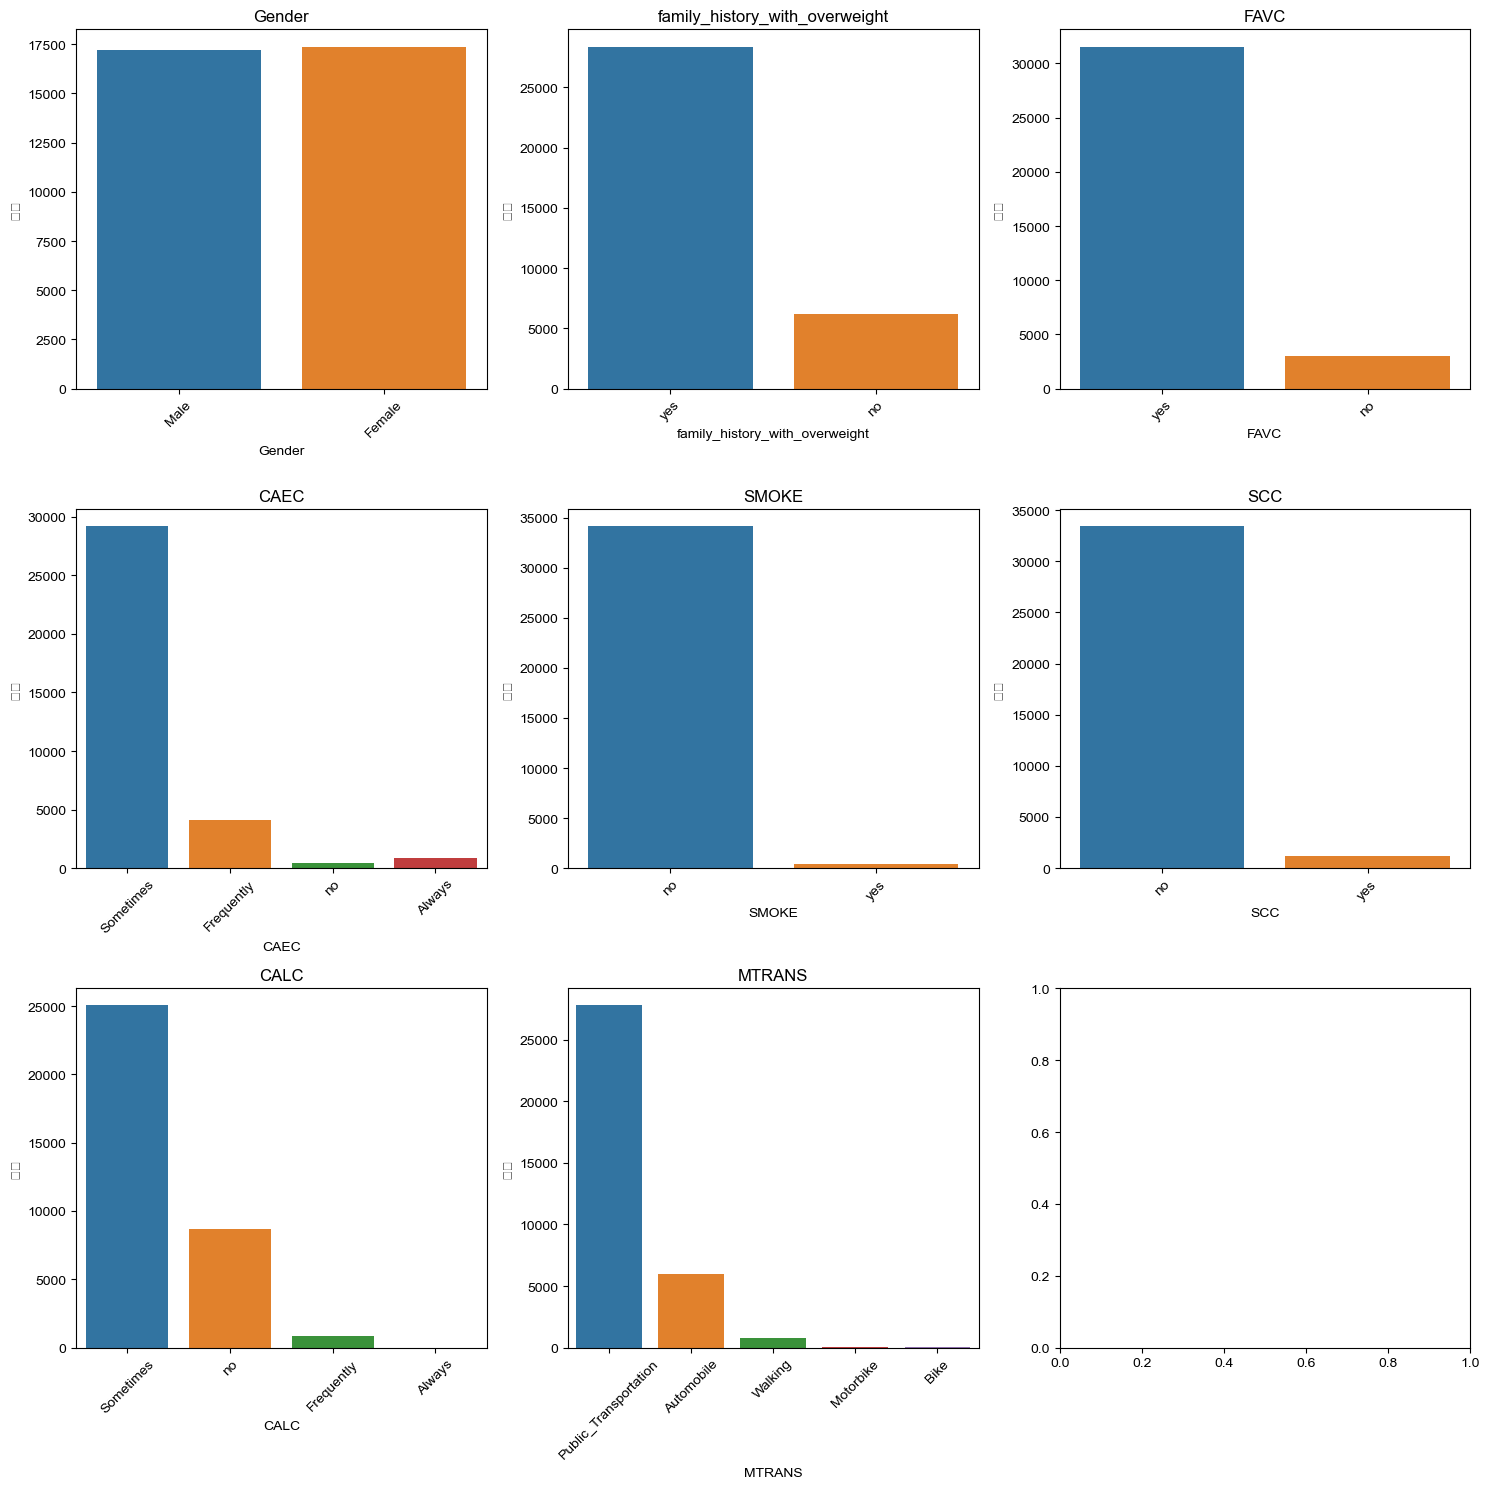

In [803]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
# plt.rcParams['font.family'] = 'Malgun Gothic'

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

# !!한글 깨짐 확인 & 색상 스타일 재설정

* 인코딩

In [804]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [805]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS','CAEC', 'CALC'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [806]:
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [807]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


* 표준화

In [808]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CH2O                                34598 non-null  float64
 6   FAF                                 34598 non-null  float64
 7   TUE                                 34598 non-null  float64
 8   Gender_Male                         34598 non-null  bool   
 9   family_history_with_overweight_yes  34598 non-null  bool   
 10  FAVC_yes                            34598 non-null  bool   
 11  SMOKE_yes                           34598

In [809]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [810]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,True,True,...,False,False,True,False,False,True,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,False,True,...,False,False,False,False,True,False,False,False,False,True
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,False,True,...,False,False,True,False,False,True,False,False,False,True
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,False,True,...,False,False,True,False,False,True,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,True,True,...,False,False,True,False,False,True,False,False,False,True


In [811]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160


In [812]:
all_df = all_df.astype(float)


In [813]:
all_df.dtypes


Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Male                           float64
family_history_with_overweight_yes    float64
FAVC_yes                              float64
SMOKE_yes                             float64
SCC_yes                               float64
MTRANS_Bike                           float64
MTRANS_Motorbike                      float64
MTRANS_Public_Transportation          float64
MTRANS_Walking                        float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
CALC_Frequently                       float64
CALC_Sometimes                    

* 데이터 분할

In [814]:
all_df[:20758] 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [815]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [816]:
all_df[20758:]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
20758,0.525665,1.690369,1.254428,0.927428,0.343353,1.304488,-0.147133,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20759,-0.503422,-1.134554,-0.825424,-0.835030,-2.483103,1.590550,0.025192,-1.016544,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20760,0.368703,-0.641290,0.910212,1.042690,0.343353,0.970226,-1.166547,-0.602126,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20761,-0.507041,-1.667844,0.608328,-0.835030,0.312134,1.240160,-1.053509,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20762,0.368703,-0.822861,0.652717,1.042690,0.343353,1.022156,-1.166547,0.209445,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [817]:
X_train = all_df[:20758]  # X_train은 비만유형이 없는 데이터프레임
y_train = train['NObeyesdad']  # 학습용 데이터의 목적 변수인 'NObeyesdad'


label_encoder = LabelEncoder()
# 비만유형에 라벨 인코딩 적용
y_train_encoded = label_encoder.fit_transform(y_train)

# 훈련, 검증데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.3, random_state=42)

X_test = all_df[20758:] 

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape)


(14530, 23) (14530,)
(6228, 23) (6228,)
(13840, 23)


In [818]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
1846,1.415253,0.572046,1.229909,-0.835030,0.343353,-1.690520,-1.166547,2.292160,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14225,-0.715656,1.397733,1.760972,1.042690,0.343353,1.320882,0.806364,0.335038,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9438,-0.364977,0.879109,0.087822,0.894773,0.319612,0.253257,1.412940,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12459,-0.503422,-0.338141,-0.825424,-0.835030,0.343353,-0.049985,0.025192,2.292160,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12189,0.276371,-0.813656,0.749521,1.042690,0.343353,0.858883,-1.135816,-0.215565,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.026697,0.258725,-0.275707,0.345664,-0.274376,-0.304850,-0.823288,0.178354,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11964,-0.328997,0.572046,0.278366,1.042690,0.343353,-0.049985,2.408672,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,-0.503422,-0.907007,-0.749300,-0.835030,0.343353,1.590550,1.216932,-1.016544,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.368703,-0.564265,0.923119,1.042690,0.343353,1.214428,-1.166547,-0.623955,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [819]:
y_train

array([3, 4, 5, ..., 5, 4, 2])

In [820]:
X_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
20758,0.525665,1.690369,1.254428,0.927428,0.343353,1.304488,-0.147133,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20759,-0.503422,-1.134554,-0.825424,-0.835030,-2.483103,1.590550,0.025192,-1.016544,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20760,0.368703,-0.641290,0.910212,1.042690,0.343353,0.970226,-1.166547,-0.602126,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20761,-0.507041,-1.667844,0.608328,-0.835030,0.312134,1.240160,-1.053509,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20762,0.368703,-0.822861,0.652717,1.042690,0.343353,1.022156,-1.166547,0.209445,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [821]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


# 일반적인 모델 컴파일

In [822]:

num_classes = len(train['NObeyesdad'].unique())
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_494 (Dense)           (None, 16)                384       
                                                                 
 dense_495 (Dense)           (None, 32)                544       
                                                                 
 dense_496 (Dense)           (None, 64)                2112      
                                                                 
 dense_497 (Dense)           (None, 128)               8320      
                                                                 
 dense_498 (Dense)           (None, 64)                8256      
                                                                 
 dense_499 (Dense)           (None, 32)                2080      
                                                                 
 dense_500 (Dense)           (None, 16)              

# 모델 훈련

In [823]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
455/455 [==============================] - 1s 989us/step - loss: 0.8501 - accuracy: 0.6685 - val_loss: 0.6698 - val_accuracy: 0.7290
Epoch 2/10
455/455 [==============================] - 0s 804us/step - loss: 0.4919 - accuracy: 0.8103 - val_loss: 0.4502 - val_accuracy: 0.8341
Epoch 3/10
455/455 [==============================] - 0s 793us/step - loss: 0.4469 - accuracy: 0.8294 - val_loss: 0.5159 - val_accuracy: 0.8004
Epoch 4/10
455/455 [==============================] - 0s 810us/step - loss: 0.4242 - accuracy: 0.8424 - val_loss: 0.4178 - val_accuracy: 0.8471
Epoch 5/10
455/455 [==============================] - 1s 1ms/step - loss: 0.4098 - accuracy: 0.8518 - val_loss: 0.4079 - val_accuracy: 0.8523
Epoch 6/10
455/455 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8558 - val_loss: 0.3904 - val_accuracy: 0.8584
Epoch 7/10
455/455 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8607 - val_loss: 0.4175 - val_accuracy: 0.852

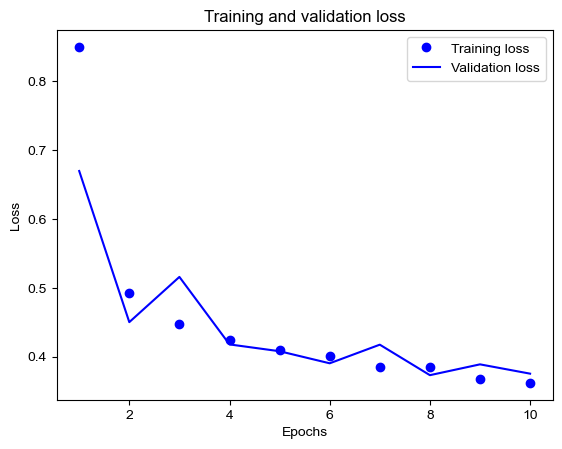

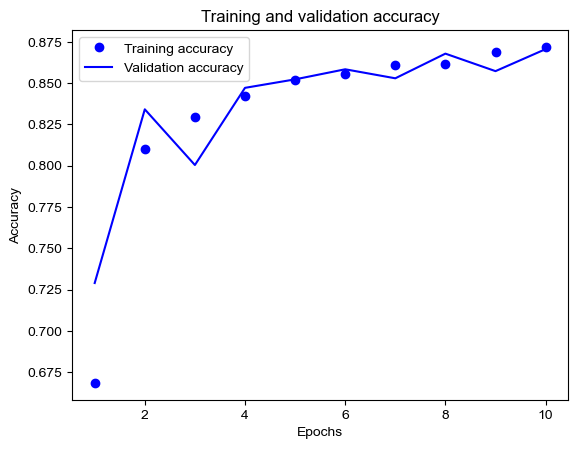

In [824]:
import matplotlib.pyplot as plt

# 손실 값
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 값
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(train_loss) + 1)

# 손실 그래프
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [828]:
# 모델을 사용하여 X_test에 대한 예측 생성
y_test_probs = model.predict(X_test)

# 각 샘플에 대한 예측된 클래스 인덱스를 추출
y_test = np.argmax(y_test_probs, axis=1)

# 예측된 라벨을 출력
print(y_test)

433/433 [==============================] - 0s 335us/step
[3 5 4 ... 0 1 3]


array([[8.04024637e-07, 3.55636615e-07, 2.62186956e-02, ...,
        5.97339240e-05, 3.06689617e-05, 2.39651563e-04],
       [1.19098084e-04, 3.35416682e-02, 7.97377620e-03, ...,
        2.88194860e-03, 9.23849404e-01, 3.15859467e-02],
       [3.76443232e-08, 3.63942308e-05, 1.10396044e-03, ...,
        9.98781502e-01, 2.31870781e-05, 2.11837488e-07],
       ...,
       [9.38213706e-01, 5.44057488e-02, 4.67771082e-04, ...,
        5.01715385e-06, 6.71359198e-03, 1.91237195e-04],
       [2.14576811e-01, 7.75975287e-01, 2.80681503e-04, ...,
        2.09098016e-05, 6.36102166e-03, 2.78358883e-03],
       [1.24158657e-06, 8.06150922e-07, 3.27905528e-02, ...,
        1.75531488e-04, 3.99444179e-05, 2.25684154e-04]], dtype=float32)

In [826]:
y_pred=model.predict(X_test)
pred_classes=[np.argmax(element) for element in y_pred] # 가장 높은 확률인 클래스 인덱스를 리스트로 저장
predC = label_encoder.inverse_transform(pred_classes) # 인덱스를 다시 원래 클래스 이름으로 변환
test['NObeyesdad']=predC # test 데이터프레임에 비만유형 컬럼에 predC값 저장
Submission=test[['id', 'NObeyesdad']]
Submission.to_csv('submission2.csv', index=None)

433/433 [==============================] - 0s 472us/step


# K-fold 사용

In [827]:
from sklearn.model_selection import KFold

# K-fold 교차 검증을 위한 K 값 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 각 fold의 평가 지표를 저장할 리스트 초기화
acc_scores = []

# K-fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # 모델 생성
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    # 모델 컴파일
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)
    
    # 검증 세트에서 평가
    _, acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_scores.append(acc)


for i, acc in enumerate(acc_scores):
    print(f"Fold {i+1} Accuracy: {acc}")

# 평균 평가 지표 출력
print(f"Mean Accuracy: {np.mean(acc_scores)}")


Epoch 1/10
364/364 [==============================] - 1s 1ms/step - loss: 0.9056 - accuracy: 0.6320 - val_loss: 0.5664 - val_accuracy: 0.7712
Epoch 2/10
364/364 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.8009 - val_loss: 0.4639 - val_accuracy: 0.8290
Epoch 3/10
364/364 [==============================] - 0s 935us/step - loss: 0.4520 - accuracy: 0.8360 - val_loss: 0.4592 - val_accuracy: 0.8238
Epoch 4/10
364/364 [==============================] - 0s 985us/step - loss: 0.4268 - accuracy: 0.8462 - val_loss: 0.4028 - val_accuracy: 0.8558
Epoch 5/10
364/364 [==============================] - 0s 832us/step - loss: 0.4106 - accuracy: 0.8509 - val_loss: 0.4121 - val_accuracy: 0.8462
Epoch 6/10
364/364 [==============================] - 0s 892us/step - loss: 0.3998 - accuracy: 0.8563 - val_loss: 0.4550 - val_accuracy: 0.8338
Epoch 7/10
364/364 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8622 - val_loss: 0.4143 - val_accuracy: 0.852

Epoch 1/10
364/364 [==============================] - 1s 1ms/step - loss: 0.9146 - accuracy: 0.6265 - val_loss: 0.5545 - val_accuracy: 0.7832
Epoch 2/10
364/364 [==============================] - 0s 916us/step - loss: 0.4946 - accuracy: 0.8116 - val_loss: 0.4908 - val_accuracy: 0.8231
Epoch 3/10
364/364 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8292 - val_loss: 0.4419 - val_accuracy: 0.8400
Epoch 4/10
364/364 [==============================] - 0s 980us/step - loss: 0.4380 - accuracy: 0.8371 - val_loss: 0.4292 - val_accuracy: 0.8465
Epoch 5/10
364/364 [==============================] - 0s 862us/step - loss: 0.4248 - accuracy: 0.8457 - val_loss: 0.4123 - val_accuracy: 0.8562
Epoch 6/10
364/364 [==============================] - 0s 979us/step - loss: 0.4039 - accuracy: 0.8548 - val_loss: 0.4317 - val_accuracy: 0.8486
Epoch 7/10
364/364 [==============================] - 0s 740us/step - loss: 0.3981 - accuracy: 0.8550 - val_loss: 0.4042 - val_accuracy: 0.8

Epoch 1/10
364/364 [==============================] - 1s 928us/step - loss: 1.0776 - accuracy: 0.5636 - val_loss: 0.5760 - val_accuracy: 0.7584
Epoch 2/10
364/364 [==============================] - 0s 724us/step - loss: 0.5258 - accuracy: 0.7943 - val_loss: 0.5182 - val_accuracy: 0.8039
Epoch 3/10
364/364 [==============================] - 0s 741us/step - loss: 0.4484 - accuracy: 0.8305 - val_loss: 0.4379 - val_accuracy: 0.8414
Epoch 4/10
364/364 [==============================] - 0s 784us/step - loss: 0.4226 - accuracy: 0.8429 - val_loss: 0.4184 - val_accuracy: 0.8493
Epoch 5/10
364/364 [==============================] - 0s 794us/step - loss: 0.4045 - accuracy: 0.8549 - val_loss: 0.4086 - val_accuracy: 0.8548
Epoch 6/10
364/364 [==============================] - 0s 733us/step - loss: 0.3954 - accuracy: 0.8563 - val_loss: 0.4175 - val_accuracy: 0.8517
Epoch 7/10
364/364 [==============================] - 0s 836us/step - loss: 0.3860 - accuracy: 0.8612 - val_loss: 0.4165 - val_accuracy:

Epoch 1/10
364/364 [==============================] - 1s 1ms/step - loss: 0.9730 - accuracy: 0.6043 - val_loss: 0.5559 - val_accuracy: 0.7780
Epoch 2/10
364/364 [==============================] - 0s 797us/step - loss: 0.4978 - accuracy: 0.8116 - val_loss: 0.5098 - val_accuracy: 0.8107
Epoch 3/10
364/364 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8381 - val_loss: 0.4474 - val_accuracy: 0.8348
Epoch 4/10
364/364 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8477 - val_loss: 0.4298 - val_accuracy: 0.8414
Epoch 5/10
364/364 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8527 - val_loss: 0.4259 - val_accuracy: 0.8434
Epoch 6/10
364/364 [==============================] - 0s 760us/step - loss: 0.3981 - accuracy: 0.8593 - val_loss: 0.4608 - val_accuracy: 0.8286
Epoch 7/10
364/364 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8643 - val_loss: 0.4241 - val_accuracy: 0.8441
Ep

Epoch 1/10
364/364 [==============================] - 1s 1ms/step - loss: 0.8841 - accuracy: 0.6464 - val_loss: 0.5576 - val_accuracy: 0.7891
Epoch 2/10
364/364 [==============================] - 0s 781us/step - loss: 0.5006 - accuracy: 0.8037 - val_loss: 0.4942 - val_accuracy: 0.8211
Epoch 3/10
364/364 [==============================] - 0s 746us/step - loss: 0.4507 - accuracy: 0.8358 - val_loss: 0.4533 - val_accuracy: 0.8348
Epoch 4/10
364/364 [==============================] - 0s 750us/step - loss: 0.4195 - accuracy: 0.8492 - val_loss: 0.4530 - val_accuracy: 0.8421
Epoch 5/10
364/364 [==============================] - 0s 861us/step - loss: 0.4053 - accuracy: 0.8548 - val_loss: 0.4431 - val_accuracy: 0.8421
Epoch 6/10
364/364 [==============================] - 0s 958us/step - loss: 0.3949 - accuracy: 0.8608 - val_loss: 0.4040 - val_accuracy: 0.8534
Epoch 7/10
364/364 [==============================] - 0s 889us/step - loss: 0.3839 - accuracy: 0.8646 - val_loss: 0.4385 - val_accuracy: 0

In [789]:
# 테스트 데이터에 대한 예측 수행
y_test_probs = model.predict(X_test)
y_test = np.argmax(y_test_probs, axis=1)

433/433 [==============================] - 0s 332us/step


In [595]:
# 예측 결과를 CSV 파일로 저장
pred_classes = [np.argmax(element) for element in y_test_probs]
predC = label_encoder.inverse_transform(pred_classes)
test['NObeyesdad'] = predC
Submission = test[['id', 'NObeyesdad']]
Submission.to_csv('submission_kfold.csv', index=None)

433/433 [==============================] - 0s 360us/step
